# Sales Analysis

In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
all_months_data.to_csv("all_data.csv", index=False)

In [4]:
##Read updated dataframe

In [5]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_data.isnull().sum() 

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
all_data.shape

(186850, 6)

In [8]:
## Remove all the NAN values rows

In [9]:
all_data.dropna(how='all', inplace=True)

In [10]:
all_data.shape

(186305, 6)

In [11]:
all_data.isnull().sum() 

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Clean up the Data!

### Drop rows with NAN

In [12]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
all_data.shape

(186305, 6)

In [14]:
all_data.dropna(how='any', inplace=True)

In [15]:
all_data.shape

(186305, 6)

##### Fing 'Or' and delete it

In [16]:
temp_df = all_data[all_data['Order Date'].str[0:2] = 'Or']
temp_df

SyntaxError: invalid syntax (<ipython-input-16-546a29d2f38b>, line 1)

In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


#### Convert columns to the correct type

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])# Make float

In [ ]:
all_data.head()

### Augment data with additional columns

#### Task 2 : Add Month Column 

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

#### Task 4 : Add a city columns

In [ ]:
# Let's user .apply() method


all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1] + ')')

#def get_state(address):
#    return address.split(',')[2]  # Instead of lambda we can directly use function

#all_data.drop(columns='Column', axis=1, inplace=True)

all_data.head()

## What was the best month for sales? How much was earned that month?

In [ ]:
all_data.head(2)

### Task 3 : Add a sales column

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [ ]:
all_data.head()

In [ ]:
results =  all_data.groupby('Month').sum()
results


In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)


plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.title('Bar plot of Sales data')
plt.show()

#### Q2 :  What city had the highest number of sales

In [ ]:
all_data.head(2)

In [ ]:
results = all_data.groupby('City').sum()
results.sort_values(by = ['Sales'] ,ascending=True)

In [ ]:
cities = [city for city, df in all_data.groupby('City')]


plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('city Name')
plt.title('Bar plot of Sales data')
plt.show()

#### Q3: What time should we display advertisement to maximize likelihood of customers buying product? 

In [ ]:
all_data.head()

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [ ]:
all_data.head()

In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

In [ ]:
all_data.groupby('Hour').sum()

In [ ]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


#Recommendation is around 11am or 7pm(19)

### Q4 : What products are most often sold together?

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [20]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016"
33,176586,Google Phone,1,600,04/10/19 17:00,"365 Center St, San Francisco, CA 94016"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001"
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001"


In [21]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


<ipython-input-21-01b7ff8d2183>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


In [22]:
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [23]:
from itertools import combinations
from collections import Counter


count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)







('Product', 'Product') 62835
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143


#### Q5 : What product sold the most? Why do you think it sold the most?

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [26]:
product_group = all_data.groupby('Product')



##### Task 4: Change the dtypes of Quantity Ordered from str to int

In [38]:

all_data = all_data[~(all_data['Quantity Ordered'] == 'Quantity Ordered')]


all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')


(all_data['Quantity Ordered'][0]).dtype

c:\users\tirupati\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


dtype('int32')

In [43]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

product_group.sum()


,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


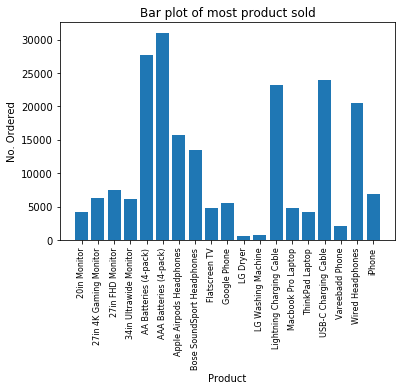

In [50]:
import matplotlib.pyplot as plt

products = [product for product, df in all_data.groupby('Product')]


plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.title('Bar plot of most product sold')
plt.xlabel('Product')
plt.ylabel('No. Ordered')
plt.show()







In [62]:
all_data.head(2)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [66]:
prices = all_data.groupby('Product').mean()

print(prices)



                            Quantity Ordered
Product                                     
20in Monitor                        1.006828
27in 4K Gaming Monitor              1.002247
27in FHD Monitor                    1.005728
34in Ultrawide Monitor              1.002912
AA Batteries (4-pack)               1.343004
AAA Batteries (4-pack)              1.502689
Apple Airpods Headphones            1.007203
Bose SoundSport Headphones          1.009906
Flatscreen TV                       1.003958
Google Phone                        1.001267
LG Dryer                            1.000000
LG Washing Machine                  1.000000
Lightning Charging Cable            1.071983
Macbook Pro Laptop                  1.000847
ThinkPad Laptop                     1.000484
USB-C Charging Cable                1.094599
Vareebadd Phone                     1.001453
Wired Headphones                    1.088709
iPhone                              1.001023
